# Draw Orderness Across Full Layers For All models

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import os
default_folder = "/outputs_mean/mean-results-full-models"
def read_metrics_for_all_models(model_list, folder=default_folder):
    model_orderness = {}
    model_left_digit = {}
    model_compressed_scaling = {}

    for model in model_list:
        file_path = os.path.join(folder, f"{model}.nocontext_single.jsonl")
        orderness_per_layer = []
        left_digit_per_layer = []
        compressed_scaling_per_layer = []
        try:
            with open(file_path, 'r') as file:
                for line in file:
                    data = json.loads(line.strip())
                    orderness_per_layer.append(data.get("orderness", 0))  # Default to 0 if "orderness" is missing
                    left_digit_per_layer.append(data.get("left_digit", 0))
                    spa_list = data.get("spacing")
                    compressed_scaling_per_layer.append(spa_list[1]/spa_list[2])

            model_orderness[model] = orderness_per_layer
            model_left_digit[model] = left_digit_per_layer
            model_compressed_scaling[model] = compressed_scaling_per_layer
        except FileNotFoundError:
            print(f"File for model {model} not found at {file_path}.")

    return model_orderness, model_left_digit, model_compressed_scaling


model_list = ["mistral-7B", "llama3.1-8b" , "Qwen2.5-7B", "gemma2-9b", "llama2-7b", "Phi3.5-4b"]

# remove gpt2, gpt-j-6b, opt-13b


In [13]:
MODEL_NAMES = {
    "mistral-7B": "Mistral-7B",
    "llama3.1-8b": "LLaMA 3.1-8B",
    "Qwen2.5-7B": "Qwen 2.5-7B",
    "gemma2-9b": "Gemma 2-9B",
    "llama2-7b": "LLaMA 2-7B",
    "Phi3.5-4b": "Phi 3.5-4B"
}

def plot_orderness_full_layers(model_orderness, fig_name="mean-orderness-full.pdf", is_norm_layer=False, model_names=MODEL_NAMES):
    plt.figure(figsize=(10, 6))
    max_layers = max([len(orderness) for orderness in model_orderness.values()])
    print(max_layers)
    for model, orderness in model_orderness.items():
        label = model_names.get(model, model.capitalize())
        layers = list(range(0, len(orderness)))
        if is_norm_layer:
            layers = [item/len(layers) for item in layers]
        # orderness = [item/len(orderness) for item in orderness]
        plt.plot(layers, orderness, label=label, linestyle='--', marker='^', linewidth=1)

    if not is_norm_layer:
        plt.xticks(range(0, max_layers, 2))
    plt.title("Layer-wise orderliness", fontsize=24)
    plt.xlabel("Layer index", fontsize=24)
    plt.ylabel("Orderliness", fontsize=24)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.legend(fontsize=16, loc='upper right')
    plt.grid(True, which="both", linestyle="--")
    plt.tight_layout()
    plt.savefig(f'./plot/{fig_name}', bbox_inches='tight', format="pdf", dpi=600)
    print(f"Saved figure to {fig_name}")
    plt.show()

# Mean-l2

43
Saved figure to all_orderliness_mean-l2.pdf


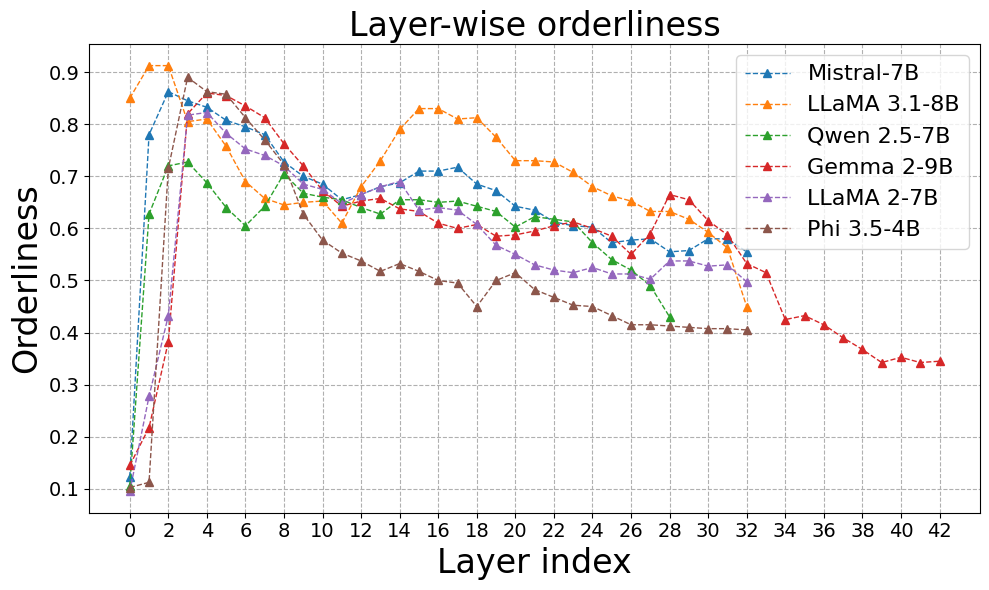

In [ ]:
folder = "/outputs_mean/mean-results-full-models"
name = "all_orderliness_mean-l2.pdf"
orderness_data,  left_digit_data, compressed_scaling_data= read_metrics_for_all_models(model_list, folder)
plot_orderness_full_layers(orderness_data, name)

# Mean-cosine

43
Saved figure to all_orderliness_mean-cosine.pdf


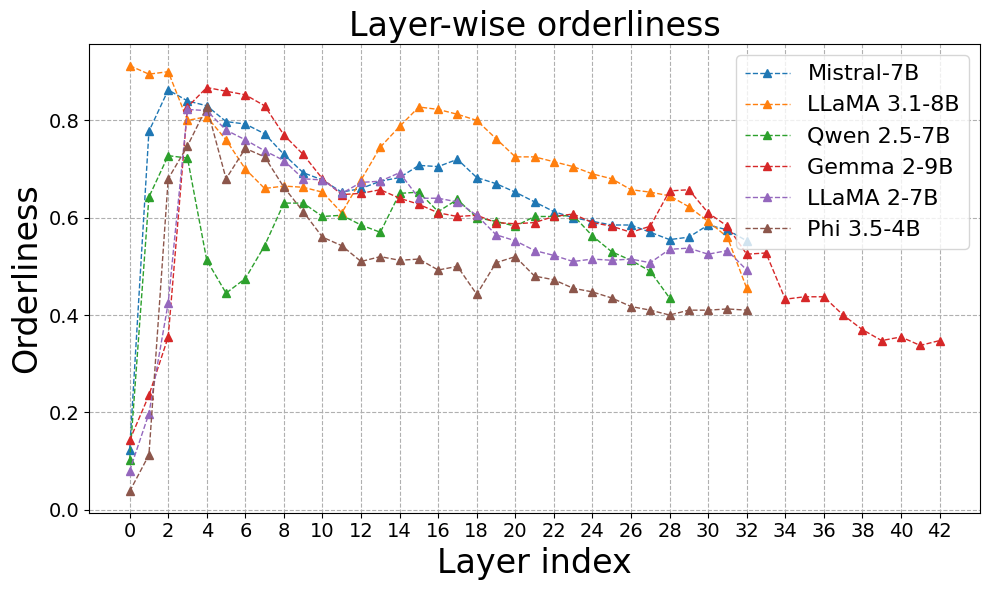

In [ ]:
folder = "/outputs_mean/results_cosine"
name = "all_orderliness_mean-cosine.pdf"
orderness_data,  left_digit_data, compressed_scaling_data= read_metrics_for_all_models(model_list, folder)
plot_orderness_full_layers(orderness_data, name)

# Last-l2

43
Saved figure to all_orderliness_last-l2.pdf


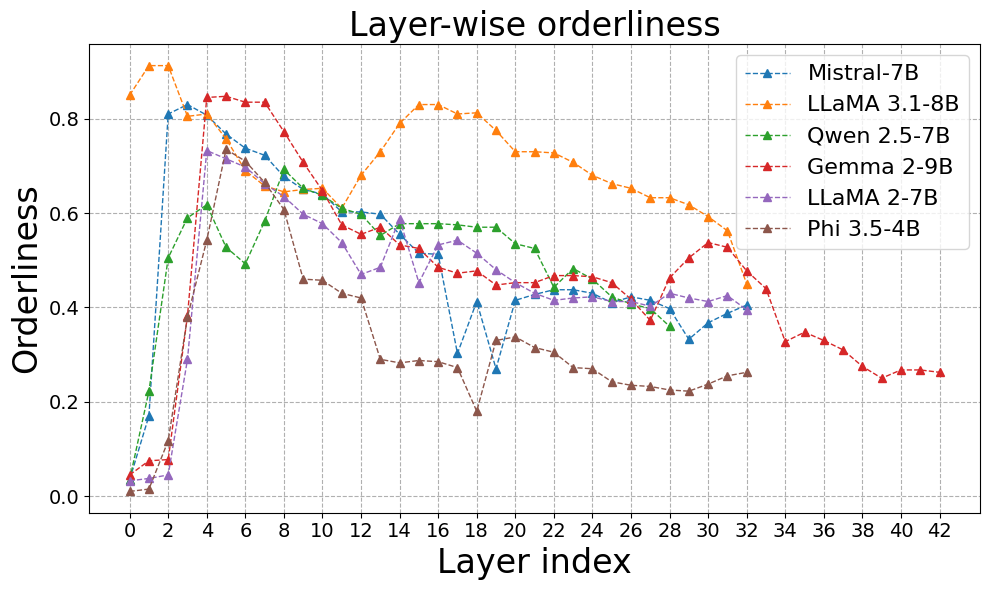

In [ ]:
folder = "/outputs_last/results"
name = "all_orderliness_last-l2.pdf"
orderness_data,  left_digit_data, compressed_scaling_data= read_metrics_for_all_models(model_list, folder)
plot_orderness_full_layers(orderness_data, name)

# Last-cosine

43
Saved figure to all_orderliness_last_cosine.pdf


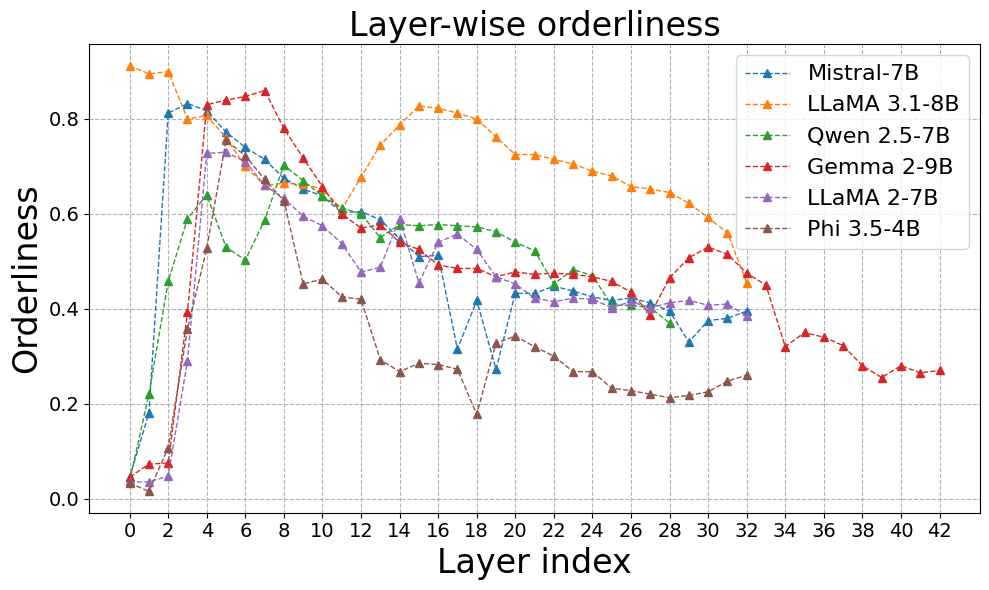

In [ ]:
folder = "/outputs_last/results_cosine"
name = "all_orderliness_last_cosine.pdf"
orderness_data,  left_digit_data, compressed_scaling_data= read_metrics_for_all_models(model_list, folder)
plot_orderness_full_layers(orderness_data, name)